# Topic Modelling


In [1]:
from __future__ import print_function
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import mglearn as mglearn
import pandas as pd
import pyLDAvis
import pyLDAvis.lda_model
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pyLDAvis.enable_notebook()
new_df = pd.read_csv('ssprocessing.csv')
new_df.dropna(subset=['Review'], inplace=True)

# Ignore the comments they belong to the the old data


## One Star Reviews


In [2]:
one_text_data=new_df[new_df['overall'] == 1]['Review']
one_text_data

5                                            not veri sharp
10                    onli receiv fabric suppos receiv more
20                         fell apart soon tri thread needl
40        horribl yarn inconsist skein skein will relat ...
49        veri poor qualiti veri yellow not all like nor...
                                ...                        
367604                                     junk poor materi
367737      like idea pay return will care not anyth seller
367764    just start third contain stuff crap way tape g...
367798    also blue suit materi just gorgeous realli pre...
367830                             would not not adher well
Name: Review, Length: 10751, dtype: object

### 10 Topics


In [3]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english',binary=True)

X = vectorizer.fit_transform(one_text_data)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)
pos_comment_topics = lda.fit_transform(X)

feature_names = np.array(vectorizer.get_feature_names_out())

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
print(feature_names[sorting])

[['work' 'like' 'wrong' ... 'campaign' 'condition' 'staz']
 ['small' 'veri' 'qualiti' ... 'staz' 'inquiri' 'vp']
 ['cheapli' 'return' 'receiv' ... 'staz' 'inquiri' 'vp']
 ...
 ['veri' 'needl' 'big' ... 'staz' 'vp' 'inquiri']
 ['apart' 'fit' 'fell' ... 'bernat' 'inquiri' 'vp']
 ['paper' 'dark' 'like' ... 'staz' 'vp' 'inquiri']]


In [4]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)
# Topic 0 Positive sentiment on product quality
# Topic 1 positive feedback on shipping
# Topic 2 Threading and maybe sewing things supplies dull and small might be negative sentiment
# Topic 3 Positive sentiment about product and seller
# Topic 4 Positive sentiment about product and what the product itself might be
# Topic 5 Positive sentiment gift and given maybe about gift wraps?
# Topic 6 ----------unsure--------
# Topic 7 Topic on product use?
# Topic 8 Positive sentiment about the appearance of items
# Topic 9 Topoic about purchasing and using a product

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
work          small         cheapli       work          wast          
like          veri          return        tri           yarn          
wrong         qualiti       receiv        just          terribl       
tini          poor          pictur        time          good          
price         break         veri          return        buy           
bad           disappoint    disappoint    onli          skein         
veri          easili        just          veri          sent          
hate          bead          want          review        hook          
return        useless       miss          like          crap          
hard          cheap         got           buy           yard          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
expe

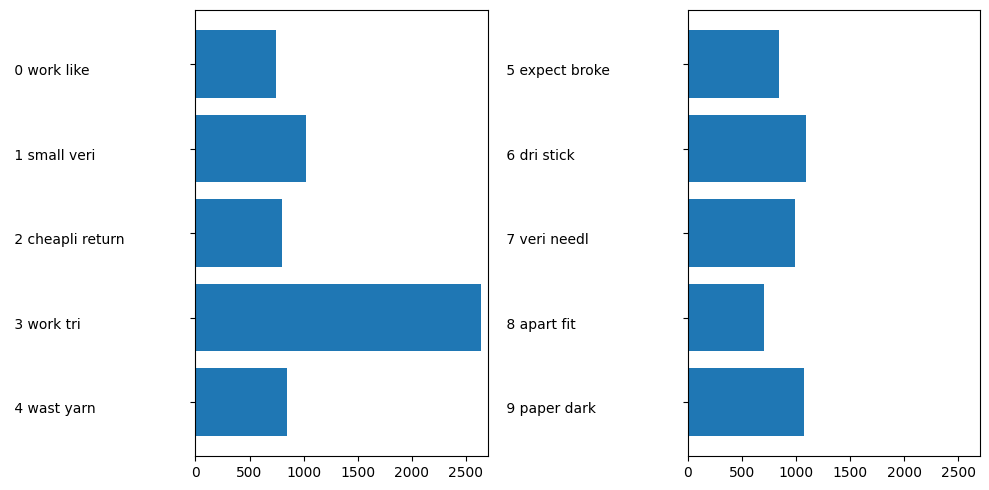

In [7]:
# Summing the document_topics over all reviews. 
# Each topic is named by the two most common words. 

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# Two column bar chart:
for col in [0, 1]:
    start = col * 5
    end = (col + 1) * 5
    ax[col].barh(np.arange(5), np.sum(pos_comment_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(5))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2700)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()
plt.show()

In [8]:
pyLDAvis.lda_model.prepare(lda,X,vectorizer)
# Topic 1 Positive feedback on sewing machine and its size including analogous crafts
# Topic 2 Kids arts and craft and thier stationary gift items
# Topic 3 Product feedback on products
# Topic 4 Positive sentiment on arts and craft
# Topic 5 Positive sentiment on craft products focused on appearence
# Topic 6 Positive sentiment on craft products focused on their function like texture coloring and gluing
# Topic 7 Positive feedback on shipping
# Topic 8 Positive Sentiments with seller interactions and product
# Topic 9 Painting stationary items possibly related to oil painting, coloring and brushes
# Topic 10 Postivie and negative experiences related to decoration crafting projects

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.028044  0.018157       1        1  31.825482
9     -0.068662 -0.028933       2        1  10.714441
6     -0.164013 -0.032019       3        1   9.485882
7     -0.001929  0.029728       4        1   8.785768
1      0.049946  0.006796       5        1   7.735174
4      0.068113 -0.083431       6        1   6.922319
2      0.048927  0.050876       7        1   6.616170
5      0.126376  0.077774       8        1   6.489110
8     -0.067583  0.116899       9        1   5.983879
0      0.036869 -0.155845      10        1   5.441775, topic_info=            Term        Freq       Total Category  logprob  loglift
2908        work  292.000000  292.000000  Default  30.0000  30.0000
2361       small  185.000000  185.000000  Default  29.0000  29.0000
933       expect  117.000000  117.000000  Default  28.0000  28.0000
2009     qualiti  164.000000  164.000000  Default  27.0000  27.0000
1920        poor  105.000000  105.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
2361       small   11.242562  185.650121  Topic10  -5.1661   0.1069
2856         way   10.454993  126.695290  Topic10  -5.2387   0.4164
402           ca    9.897656   87.155939  Topic10  -5.2935   0.7357
762   disappoint    9.288865  187.537981  Topic10  -5.3570  -0.0941
400          buy    9.122412  195.881742  Topic10  -5.3751  -0.1557

[769 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7         8  0.648496      12x12
8         7  0.814999         13
25        2  0.856929         21
30        6  0.771330        236
32        6  0.832511        244
...     ...       ...        ...
2940      9  0.039796       year
2940     10  0.059694       year
2944      1  0.263427  yesterday
2944      8  0.658569  yesterday
2952      5  0.713955      zebra

[2259 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 7, 8, 2, 5, 3, 6, 9, 1])

### 20 Topics


In [9]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english',binary=True)

X = vectorizer.fit_transform(one_text_data)

# Learning 20 topics
lda20 = LatentDirichletAllocation(n_components=20, learning_method="batch",
                                max_iter=25, random_state=0)
pos_comment_topics20 = lda20.fit_transform(X)
print("lda.components_.shape: {}".format(lda20.components_.shape))

sorting = np.argsort(lda20.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer:
feature_names20 = np.array(vectorizer.get_feature_names_out())
print(feature_names20[sorting])

lda.components_.shape: (20, 2957)
[['work' 'wrong' 'return' ... 'connector' 'bitti' 'chromium']
 ['veri' 'tri' 'time' ... 'leakag' 'lobster' '00']
 ['cheapli' 'hard' 'apart' ... 'flammabl' 'preschool' 'pleasant']
 ...
 ['junk' 'tini' 'price' ... 'apolog' 'mister' '00']
 ['dri' 'great' 'suck' ... 'dibutyl' 'chocol' '00']
 ['thread' 'sew' 'bobbin' ... 'cus' 'cuttlebug' '00']]


In [10]:
# Print out the 20 topics:
mglearn.tools.print_topics(topics=range(20), feature_names=feature_names20,
                           sorting=sorting, topics_per_chunk=5, n_words=10)
# Topic 0 Positive sentiment on product quality and appearance
# Topic 1 Positive feedback on delivery speed and satisfaction
# Topic 2 Positive sentiment on enjoyable crafting activities
# Topic 3 Positive feedback on product quality and recommendations
# Topic 4 Positive sentiment on paint products
# Topic 5 Positive sentiment on crafting supplies variety 
# Topic 6 Positive feedback on fabric quality and craft
# Topic 7 Neutral feedback on fabric quality and craft
# Topic 8 Positive sentiment on sewing and knitting machines
# Topic 9 --------unsure... desire want and expectations?
# Topic 10 Christmas-themed crafts and gifts
# Topic 11 Positive sentiment on crafting projects and their outcomes
# Topic 12 Positive feedback on ease of use and results of crafting materials
# Topic 13 Positive sentiment on appearence of items crafts
# Topic 14 --------unsure...
# Topic 15 seems to contain lots of action words regarding using and buying
# Topic 16 Positive sentiment on expectations of items and descriptions
# Topic 17 Positive feedback on product value 
# Topic 18 Positive sentiment on product descriptions and their accuracy
# Topic 19 Small-sized crafting items

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
work          veri          cheapli       break         terribl       
wrong         tri           hard          easili        worth         
return        time          apart         easi          yarn          
bad           just          fell          tear          skein         
send          like          stiff         veri          doesnt        
smell         buy           flimsi        describ       small         
hand          better        veri          weight        stick         
leak          work          fall          string        hook          
wax           someth        stink         away          togeth        
know          needl         sorri         bend          work          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
brok

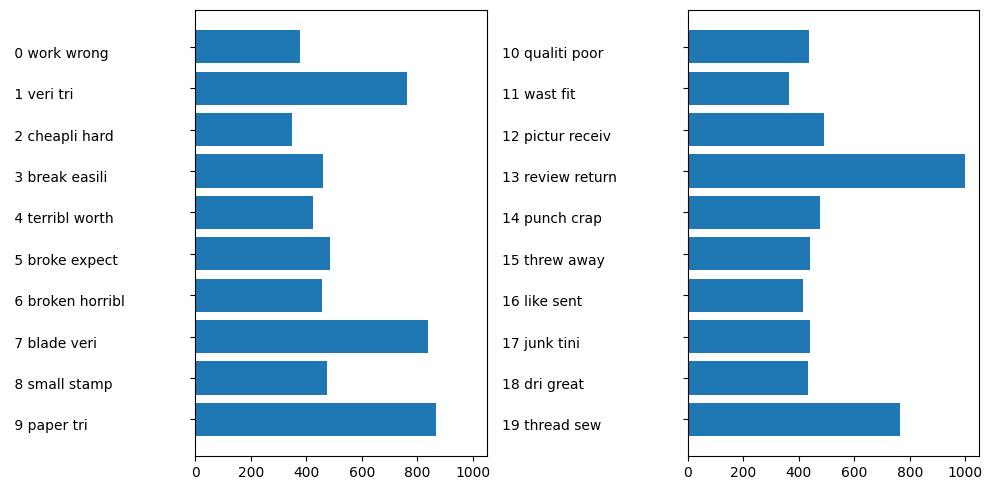

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Topic_names for 20 topics
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names20[sorting[:, :2]])]

# two column bar chart:
for col in [0, 1]:
    start = col * 10
    end = (col + 1) * 10
    ax[col].barh(np.arange(10), np.sum(pos_comment_topics20, axis=0)[start:end])
    ax[col].set_yticks(np.arange(10))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 1050)  
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130) 
plt.tight_layout()

In [15]:
pyLDAvis.lda_model.prepare(lda20,X,vectorizer)
# 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.012793 -0.045864       1        1  11.891610
9     -0.057313 -0.071014       2        1   9.541148
1      0.038537 -0.034371       3        1   8.923830
7      0.047008 -0.039677       4        1   8.447128
19     0.090627 -0.053875       5        1   8.200810
14    -0.035976  0.040498       6        1   4.406901
8     -0.051910  0.013993       7        1   4.081446
12    -0.097517  0.132307       8        1   3.918710
3      0.059761  0.064879       9        1   3.917108
5      0.087585 -0.040094      10        1   3.837373
6     -0.143292 -0.110719      11        1   3.789528
15    -0.034319 -0.038075      12        1   3.682156
17     0.080637  0.052513      13        1   3.655523
18    -0.115779 -0.141579      14        1   3.505661
4      0.008484  0.046401      15        1   3.451839
16     0.094270  0.047478      16        1   3.304484
10    -0.117899  0.159838      17        1   3.174970
11     0.114179 -0.023025      18        1   2.952819
2      0.055151 -0.005219      19        1   2.712346
0     -0.035026  0.045605      20        1   2.604609, topic_info=         Term        Freq       Total Category  logprob  loglift
2908     work  294.000000  294.000000  Default  30.0000  30.0000
2009  qualiti  165.000000  165.000000  Default  29.0000  29.0000
2361    small  188.000000  188.000000  Default  28.0000  28.0000
2931    wrong   69.000000   69.000000  Default  27.0000  27.0000
1920     poor  107.000000  107.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1152      got    7.619469  118.772543  Topic20  -4.8183   0.9014
2813     veri    8.177542  298.124600  Topic20  -4.7476   0.0518
2895       wo    6.172861   72.906606  Topic20  -5.0288   1.1789
2703      tri    6.291224  158.599889  Topic20  -5.0098   0.4207
1496     like    6.357753  229.632705  Topic20  -4.9993   0.0611

[1339 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2         1  0.247159     100
2         2  0.049432     100
2         3  0.049432     100
2         6  0.444887     100
2         7  0.148296     100
...     ...       ...     ...
2952     12  0.692270   zebra
2956      3  0.288046  zipper
2956      6  0.096015  zipper
2956      7  0.480077  zipper
2956     13  0.096015  zipper

[4769 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 10, 2, 8, 20, 15, 9, 13, 4, 6, 7, 16, 18, 19, 5, 17, 11, 12, 3, 1])

## Five Star Reviews


In [16]:
five_text_data=new_df[new_df['overall'] == 5]['Review']
five_text_data

0         love pen sparkl delight brilliant colour even ...
1                                       work well most cone
2         great assort color though there lot pink mix s...
3                                                      just
4                                400 bird hospit each month
                                ...                        
367920    perfect applic bottl dispens powder glass pain...
367922                       love die great background card
367923    love daric emboss folder darci folder veri rea...
367924    add earthi previous want brighter primari colo...
367926    photo canvas christma realli good task adher p...
Name: Review, Length: 281267, dtype: object

### 10 Topics


In [17]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english',binary=True)

X = vectorizer.fit_transform(five_text_data)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)
pos_comment_topics = lda.fit_transform(X)

feature_names = np.array(vectorizer.get_feature_names_out())

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
print(feature_names[sorting])

[['fast' 'ship' 'time' ... 'rami' 'raider' 'linet']
 ['nice' 'perfect' 'thank' ... 'entregar' 'paquet' 'vendedor']
 ['paint' 'brush' 'color' ... 'rapidez' 'entregar' 'vendedor']
 ...
 ['great' 'work' 'just' ... 'paquet' 'atencion' 'vendedor']
 ['work' 'great' 'just' ... 'paquet' 'rapidez' 'vendedor']
 ['good' 'qualiti' 'describ' ... 'paquet' 'atencion' 'vendedor']]


In [18]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

# Topic 0: Positive sentiment on stamps
# Topic 1: Positive sentiment on beads and jewelry
# Topic 2: Positive sentiment on needles and yarn for crafting
# Topic 3: Positive sentiment on penciles and paint
# Topic 4: Positive sentiment on color expectations
# Topic 5: Positive sentiment on cards and paper
# Topic 6: Positive sentiment on product quality
# Topic 7: Positive sentiment on glue and its efficacy
# Topic 8: Positive sentiment on fast delivery and appearence
# Topic 9: Positive sentiment on sewing machines

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
fast          nice          paint         love          awesom        
ship          perfect       brush         card          great         
time          thank         color         die           love          
arriv         veri          great         gift          cut           
quick         pretti        love          make          veri          
great         pleas         work          great         easi          
deliveri      quilt         ink           veri          sharp         
describ       work          watercolor    perfect       work          
thank         wife          pencil        beauti        sew           
came          love          paper         christma      scissor       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
love

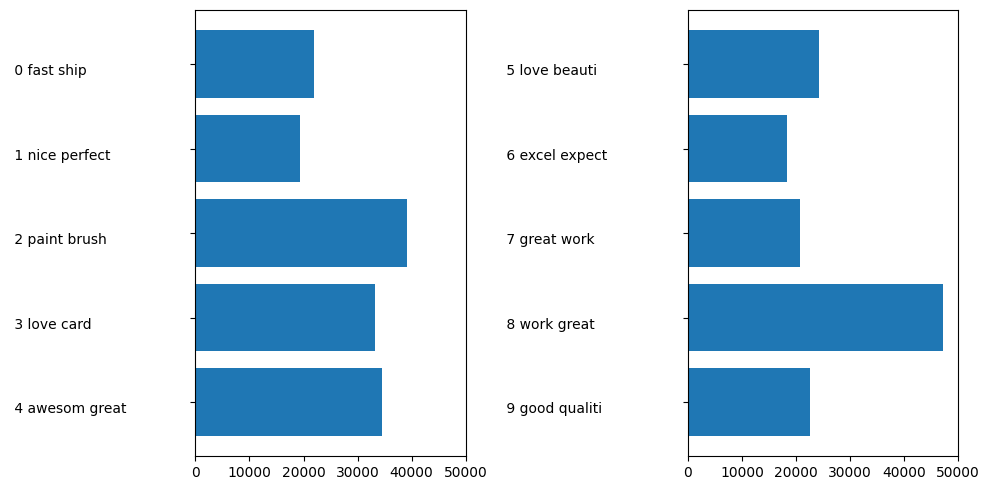

In [28]:
# Summing the document_topics over all reviews. 
# Each topic is named by the two most common words. 

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# Two column bar chart:
for col in [0, 1]:
    start = col * 5
    end = (col + 1) * 5
    ax[col].barh(np.arange(5), np.sum(pos_comment_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(5))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 50000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()
plt.show()

In [29]:
pyLDAvis.lda_model.prepare(lda,X,vectorizer)
# Topic 1 Positive sentiment about sewing machine and its needles
# Topic 2 Talks about glue and their efficacy
# Topic 3 Positive sentiment about color pencils ink markers and papers
# Topic 4 Positive sentiment about cutting tools paper scrapebooks and other stationarys related to christmas
# Topic 5 Positive sentiment about beads and jewelry other crafts accessories
# Topic 6 Positive sentiment about sewing machine crotchet knitting embroidery and sewing
# Topic 7 Contains positive words used to describe products
# Topic 8 Positive sentiment about shipping and delivery
# Topic 9 ----unsure
# Topic 10 ----unsure

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.161731 -0.088471       1        1  23.623142
2     -0.149555 -0.095560       2        1  17.561078
4     -0.142879 -0.036579       3        1  12.532506
3     -0.127937 -0.044688       4        1  12.142954
0      0.054884 -0.058294       5        1   6.825936
5     -0.098376  0.129220       6        1   6.611767
9      0.181814 -0.084527       7        1   5.964067
6      0.100098 -0.068730       8        1   4.943647
7      0.321678 -0.030145       9        1   4.926871
1      0.022005  0.377774      10        1   4.868033, topic_info=         Term          Freq         Total Category  logprob  loglift
3880    great  23721.000000  23721.000000  Default  30.0000  30.0000
3788     good  11605.000000  11605.000000  Default  29.0000  29.0000
5112     love  16533.000000  16533.000000  Default  28.0000  28.0000
5722     nice   9816.000000   9816.000000  Default  27.0000  27.0000
6227  perfect   8765.000000   8765.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
2832     easi    298.330343   4744.113801  Topic10  -4.7894   0.2560
6892   realli    242.346221   3389.245442  Topic10  -4.9972   0.3845
7532      set    151.436763   2622.653856  Topic10  -5.4674   0.1707
5197     make    149.959271   3544.386381  Topic10  -5.4772  -0.1403
2252      cut    122.590610   1771.309599  Topic10  -5.6787   0.3519

[816 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
148       6  0.886382        28mm
192       7  0.933875         40k
204       3  0.961930        45mm
345       4  0.981041          a2
347       9  0.899378          a5
...     ...       ...         ...
9744      3  0.043832         yes
9744      4  0.063008         yes
9744      7  0.443796         yes
9789     10  0.908206      zieman
9799      8  0.891231  zipperstop

[2059 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 5, 4, 1, 6, 10, 7, 8, 2])

### 20 Topics


In [30]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

X = vectorizer.fit_transform(one_text_data)

# Learning 20 topics
lda20 = LatentDirichletAllocation(n_components=20, learning_method="batch",
                                max_iter=25, random_state=0)
pos_comment_topics20 = lda20.fit_transform(X)
print("lda.components_.shape: {}".format(lda20.components_.shape))

sorting = np.argsort(lda20.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names20 = np.array(vectorizer.get_feature_names_out())
print(feature_names20[sorting])

lda.components_.shape: (20, 2957)
[['work' 'wrong' 'return' ... 'bulg' 'ppm' 'jerrysartarama']
 ['veri' 'needl' 'tri' ... 'condus' 'cardmak' '00']
 ['cheapli' 'hard' 'flimsi' ... 'pom' '4x' 'slipper']
 ...
 ['junk' 'tini' 'super' ... 'vp' 'ppm' '00']
 ['dri' 'ink' 'silver' ... 'exposur' 'regul' '00']
 ['thread' 'hook' 'bobbin' ... 'patern' 'tat' '00']]


In [31]:
# Print out the 20 topics:
mglearn.tools.print_topics(topics=range(20), feature_names=feature_names20,
                           sorting=sorting, topics_per_chunk=5, n_words=10)
# Topic 0 Positive sentiment about product quality and color 
# Topic 1 Positive feedback on delivery speed and satisfaction
# Topic 2 Positive sentiment about blue-colored products
# Topic 3 Positive feedback on product and quality
# Topic 4 Positive sentiment about colorful paint and canvas for art
# Topic 5 Positive sentiment about the variety and size of items
# Topic 6 Positive feedback on needle/crafts sets
# Topic 7 Neutral sentiment about crafting tape and cutting tools
# Topic 8 Positive sentiment about knitting felting and embroidery
# Topic 9 Topic on product categories/names
# Topic 10 Positive sentiment about cricut machines and christmas related arts and crafts
# Topic 11 -----------unsure
# Topic 12 -----------unsure
# Topic 13 Feedback on the use of yarn and crotchet items
# Topic 14 Positive sentiment about gifts, dies, and given yarn
# Topic 15 -----------unsure action words about buying and using
# Topic 16 Positive sentiment about delivery and shipping
# Topic 17 Positive feedback on the coloring stationaries value
# Topic 18 Positive sentiment about delivery and shipping
# Topic 19 Topic on small product sizes and scissors

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
work          veri          cheapli       blade         terribl       
wrong         needl         hard          fabric        worth         
return        tri           flimsi        veri          brush         
break         mold          stiff         cut           skein         
sent          like          want          scissor       oz            
bad           time          veri          easi          doesnt        
easili        hold          charm         dull          yarn          
smell         just          sorri         paper         hair          
send          wire          stencil       describ       paint         
wax           bend          way           sharp         chip          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
brok

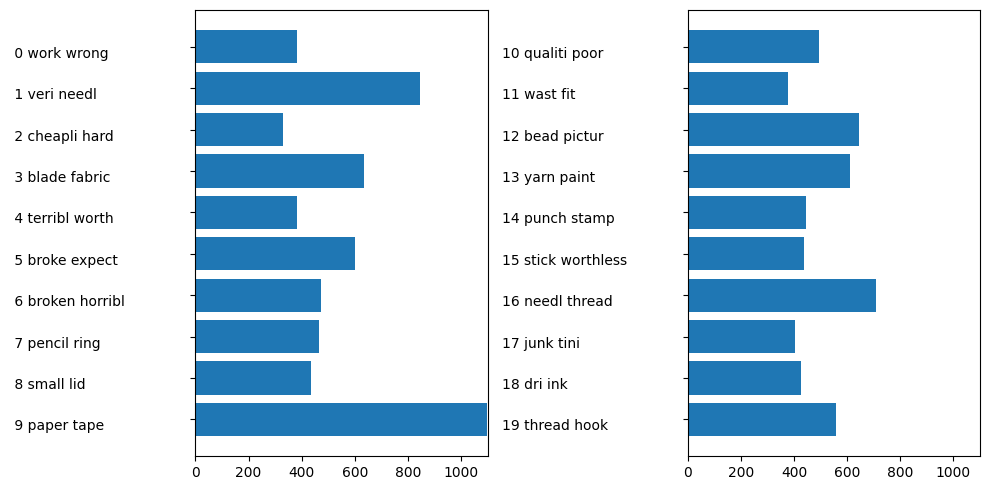

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Topic_names for 20 topics
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names20[sorting[:, :2]])]

# two column bar chart:
for col in [0, 1]:
    start = col * 10
    end = (col + 1) * 10
    ax[col].barh(np.arange(10), np.sum(pos_comment_topics20, axis=0)[start:end])
    ax[col].set_yticks(np.arange(10))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 1100)  
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130) 
plt.tight_layout()

In [35]:
pyLDAvis.lda_model.prepare(lda20,X,vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.017225 -0.068747       1        1  12.625344
1     -0.042687 -0.009085       2        1   9.720615
16    -0.121502  0.037467       3        1   7.479301
13     0.048548 -0.010866       4        1   6.261144
3     -0.048735  0.026154       5        1   6.070776
12     0.158835  0.069495       6        1   5.473221
5     -0.040886 -0.032579       7        1   5.244847
19    -0.051284  0.086923       8        1   5.176072
14    -0.025451 -0.020140       9        1   4.189183
7     -0.085941  0.017355      10        1   4.160617
6      0.038633 -0.171065      11        1   3.923307
10     0.103616  0.029573      12        1   3.812908
8      0.064223  0.079087      13        1   3.775923
15    -0.033583 -0.059113      14        1   3.581968
18     0.004770 -0.189512      15        1   3.560109
17     0.081091  0.088777      16        1   3.406592
4      0.111276 -0.034676      17        1   3.214802
11    -0.109626  0.045740      18        1   2.987650
0     -0.101108  0.033504      19        1   2.691034
2      0.032586  0.081709      20        1   2.644588, topic_info=         Term        Freq       Total Category  logprob  loglift
2908     work  301.000000  301.000000  Default  30.0000  30.0000
820       dri   98.000000   98.000000  Default  29.0000  29.0000
1024      fit   99.000000   99.000000  Default  28.0000  28.0000
2361    small  185.000000  185.000000  Default  27.0000  27.0000
2009  qualiti  161.000000  161.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
2908     work    7.102886  301.750215  Topic20  -4.8527  -0.1164
2361    small    6.630600  185.210205  Topic20  -4.9215   0.3029
1813    paper    5.890387  140.874709  Topic20  -5.0398   0.4581
400       buy    5.515759  187.322880  Topic20  -5.1055   0.1074
227       bad    5.275734   91.830693  Topic20  -5.1500   0.7758

[1306 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0        17  0.551466      00
3        10  0.600422    1000
9         1  0.105655      14
9        10  0.105655      14
9        16  0.105655      14
...     ...       ...     ...
2949     16  0.624713      yr
2952     12  0.800295   zebra
2956      2  0.072340  zipper
2956      9  0.217021  zipper
2956     16  0.651062  zipper

[4498 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 17, 14, 4, 13, 6, 20, 15, 8, 7, 11, 9, 16, 19, 18, 5, 12, 1, 3])